# NSL Notebook 08

In [1]:
from default import *

## Exercise 08.2

In this exercise we would like to optimize the ground state of a single quantum particle
in a one dimensional (1D) space confined by the following external potential:

$$ V(x) = x^4 -\frac{5}{2}\,x^2$$

As variational function will use:

$$\Psi^{\mu,\,\sigma}_T(x)\propto N(x,\,\mu,\,\sigma) + N(x,\,-\mu,\,\sigma)$$

And the $E_{GS}$ will be approximated by: 

$$\langle\hat{H}\rangle_T = \int dx\,\lvert \Psi^{\mu,\,\sigma}_T(x) \rvert^2\,\dfrac{\hat{H}\,\Psi^{\mu,\,\sigma}_T(x)}{\Psi^{\mu,\,\sigma}_T(x)} \quad \text{if} \quad \lvert \lvert \Psi^{\mu,\,\sigma}_T(x) \rvert \rvert^2 = 1 $$

The idea is:

1. Choose start value for $\mu$ and $\sigma$
2. **Metropolis algo** to generate $x$ points distributed as $\lvert \Psi^{\mu,\,\sigma}_T(x) \rvert^2$
3. use these points to compute a **MC** integration over $(\hat{H}\,\Psi(x))/\Psi(x)$ with blocking method to find uncertainties
4. Tuning $\mu$ and $\sigma$, and repeat from 2., until a best estimation of $E_{GS}$ is reached

Clarification: for normalizzation of $\Psi^{\mu,\,\sigma}_T(x)$ I used a simple sympy script, that is able to compute the calculations needed to this/these exercises, and print them to stdout formatted as `c++` code, so ready to be copied and pasted.

Clarification: during the optimization process to avoid calculate every time the integral using blocking method, I preferred to tune the parameters without blocking method, and then with the best computing blocking method.

### Exercise 08.2.1

Below the results of $GS$ using blocking method, $M=5*10^5$ and $N=100$, with:

$$ \mu = 0.786 \qquad \sigma = 0.432 $$

the final average show a discreet agreement (taking into account that this remains a variational approach) with the thoretical value $E_{GS}=-0.4605$

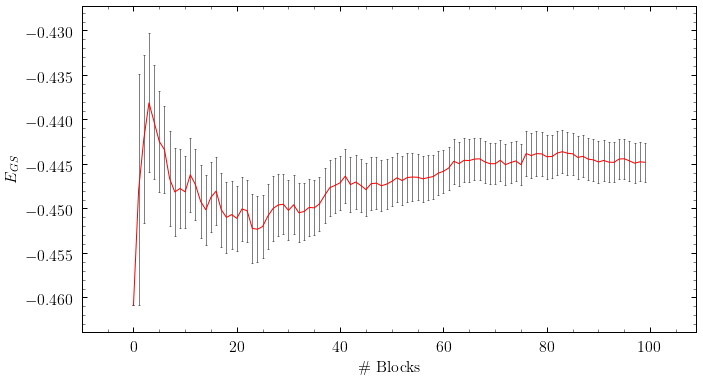

In [2]:
fig, ax = plt.subplots()

df = pd.read_csv('E-gs-blk.csv', header=None, names=['mean','mean_err']);
df["mean"].plot.line(yerr=df["mean_err"], 
                     color='r', 
                     ecolor='gray', 
                     capthick=0.5, 
                     ax=ax);

ax.set_ylabel('$E_{GS}$')
ax.set_xlabel("\# Blocks");

### Exercise 08.2.2

Below I plotted: the final shape of optimized $\lvert \Psi_T^{\mu\,\sigma} \rvert^2$ that fits the histogram of final $x$ points distribution,

In [3]:
from theory import *

together with the exact density function for $GS$ computed using analytical method, and imported above.

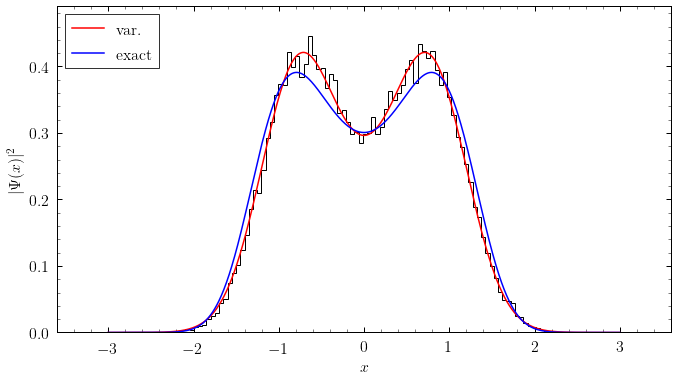

In [4]:
fig, ax = plt.subplots()

df_x = pd.read_csv('x.out', header=None, names=['v'])
ax.hist(df_x['v'], 100, density=True, histtype='step');

mu = 0.786
sigma = 0.432
x = np.linspace(-3,3,1000)
psi2_var = np.sqrt(2)*(np.exp(2*mu*x/sigma**2) + 
                       2*np.exp(mu*x/sigma**2) + 1)*(np.exp(-x*(mu + x/2)/sigma**2)/
                       (4*np.sqrt(np.pi)*sigma*(np.exp(mu**2/(2*sigma**2)) + 1)))
psi2_teo = (psi[0])**2

ax.plot(x, psi2_var, '-r', lw=1.5, label='var.');
ax.plot(x, psi2_teo, '-b', lw=1.5, label='exact');

ax.legend();
ax.set_ylabel('$|\\Psi(x)|^2$', fontsize='medium');
ax.set_xlabel('$x$', fontsize='medium');

## Exercise 08.3

Use the PIMC/PIGS code, to study the same 1D quantum system.

### Exercise 08.3.1

I plot below results from **PIGS algo** using $\Psi_T(x)=1$ and $\Psi_T(x)=\Psi^{\mu,\,\sigma}_T(x)$ (with my optimized parameters), compared with optimized variational pdf.

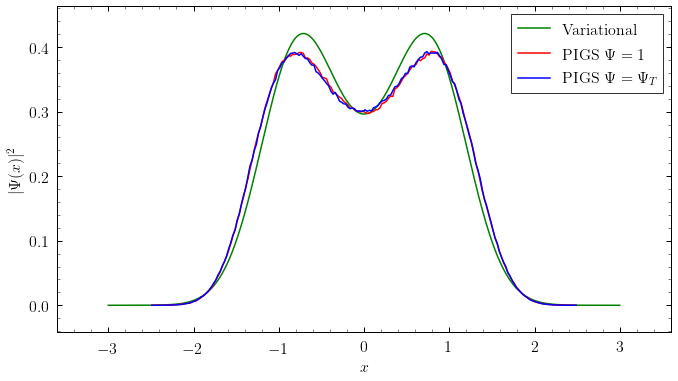

In [5]:
fig, ax = plt.subplots()

dfpt = pd.read_csv('psi2-trivial.tsv', 
                   header=None, 
                   sep=' ', 
                   names=['x','p','e'])
dfpt = dfpt[100:-100]
dfpa = pd.read_csv('psi2-ansatz.tsv', 
                   header=None, 
                   sep=' ', 
                   names=['x','p','e'])
dfpa = dfpa[100:-100]

ax.plot(x, psi2_var, '-g', lw=1.5, label='Variational');
ax.plot(dfpt['x'], dfpt['p'], ls='-', lw=1.5, c='r', label='PIGS $\Psi=1$');
ax.plot(dfpa['x'], dfpa['p'], ls='-', lw=1.5, c='b', label='PIGS $\Psi=\Psi_{T}$');

ax.legend();
ax.set_ylabel('$|\\Psi(x)|^2$', fontsize='medium');
ax.set_xlabel('$x$', fontsize='medium');

### Exercise 08.3.2

The same PIGS calculation using $\Psi_T(x)=1$ and $\Psi_T(x)=\Psi^{\mu,\,\sigma}_T(x)$, but compared with lower time propagation $\tau=1$, that seems to distort the results, mostly for the trivial eigenfunction.

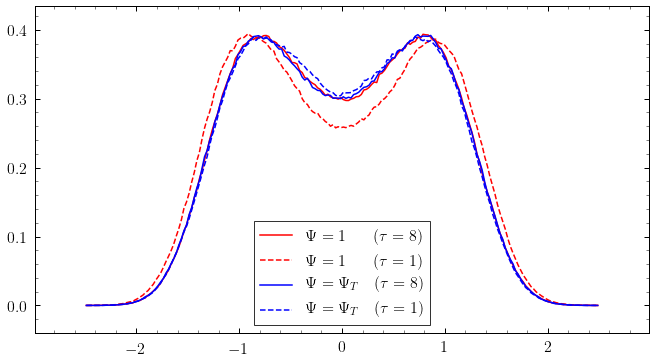

In [6]:
fig, ax = plt.subplots()

dfpt = pd.read_csv('psi2-trivial.tsv', 
                   header=None, 
                   sep=' ', 
                   names=['x','p','e'])
dfpt = dfpt[100:-100]
dfpt1 = pd.read_csv('psi2-trivial-1.tsv', 
                    header=None, sep=' ', 
                    names=['x','p','e'])
dfpt1 = dfpt1[100:-100]
dfpa = pd.read_csv('psi2-ansatz.tsv', 
                   header=None, 
                   sep=' ', 
                   names=['x','p','e'])
dfpa = dfpa[100:-100]
dfpa1 = pd.read_csv('psi2-ansatz-1.tsv', 
                    header=None, 
                    sep=' ', 
                    names=['x','p','e'])
dfpa1 = dfpa1[100:-100]

ax.plot(dfpt['x'], dfpt['p'], ls='-', lw=1.5, c='r', 
        label='$\Psi=1 \quad\;\;\, (\\tau=8)$');

ax.plot(dfpt1['x'], dfpt1['p'], ls='--', lw=1.5, c='r', 
        label='$\Psi=1 \quad\;\;\, (\\tau=1)$');

ax.plot(dfpa['x'], dfpa['p'], ls='-', lw=1.5, c='b', 
        label='$\Psi=\Psi_{T} \quad (\\tau=8)$');

ax.plot(dfpa1['x'], dfpa1['p'], ls='--', lw=1.5, c='b', 
        label='$\Psi=\Psi_{T} \quad (\\tau=1)$');

ax.legend();